In [1]:
from nimbro_vision_server.utils import load_image_b64, load_url_b64, visualize_kosmos2

### Setup

In [2]:
import json
import requests

TOKEN = "super_secret_access_token"
headers = {
    "Authorization": f"Bearer {TOKEN}"
}

# make sure to start a Kosmos-2 server and use the correct address, port and access token
server_base = "http://localhost:9000"

### Health

In [3]:
url = f"{server_base}/health"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print("Data:", data)
else:
    print("Failed to retrieve health. Status code:", response.status_code)

Data: {'status': 'ok', 'cuda_available': True}


### Model Flavors

In [4]:
url = f"{server_base}/model_flavors"

response = requests.get(url, headers=headers)
if response.status_code == 200:
    data = response.json()
    print("Data:", data)
else:
    print("Failed to retrieve model flavors. Status code:", response.status_code)

Data: {'flavors': ['patch14-224']}


### Load Model

* Alternatively use "export KOSMOS2_PRELOAD_FLAVOR=patch14-224" before starting the server.

In [5]:
url = f"{server_base}/load"
payload = {'flavor': 'patch14-224'}

response = requests.post(url, json=payload, headers=headers)

if response.status_code == 200:
    output = response.json()
    print(output)
else:
    print(f"Request failed with status code: {response.status_code}")

{'loaded_model': 'Model', 'flavor': 'patch14-224'}


### Load example for inference endpoint

In [6]:
# load example images
image_b64_table = load_image_b64('example_image.jpg')
image_b64_snowman = load_url_b64("https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.jpg")
image_b64_corgi = load_url_b64('https://github.com/NVlabs/describe-anything/blob/main/images/1.jpg?raw=true')

### Run inference for various tasks

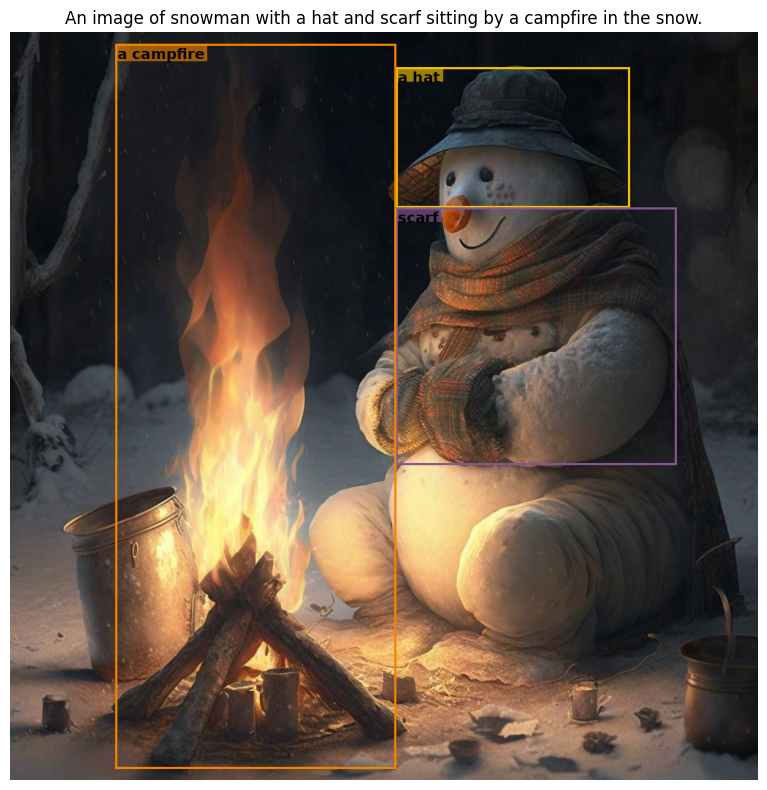

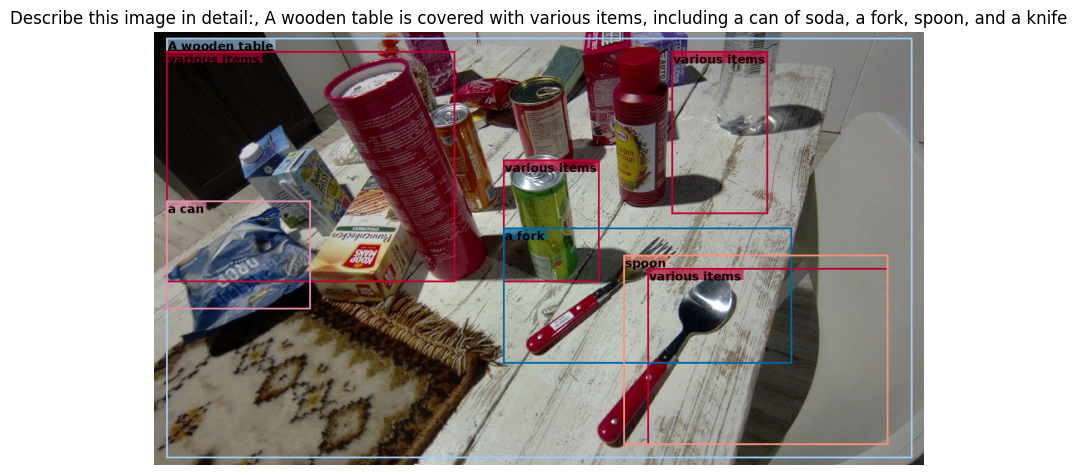

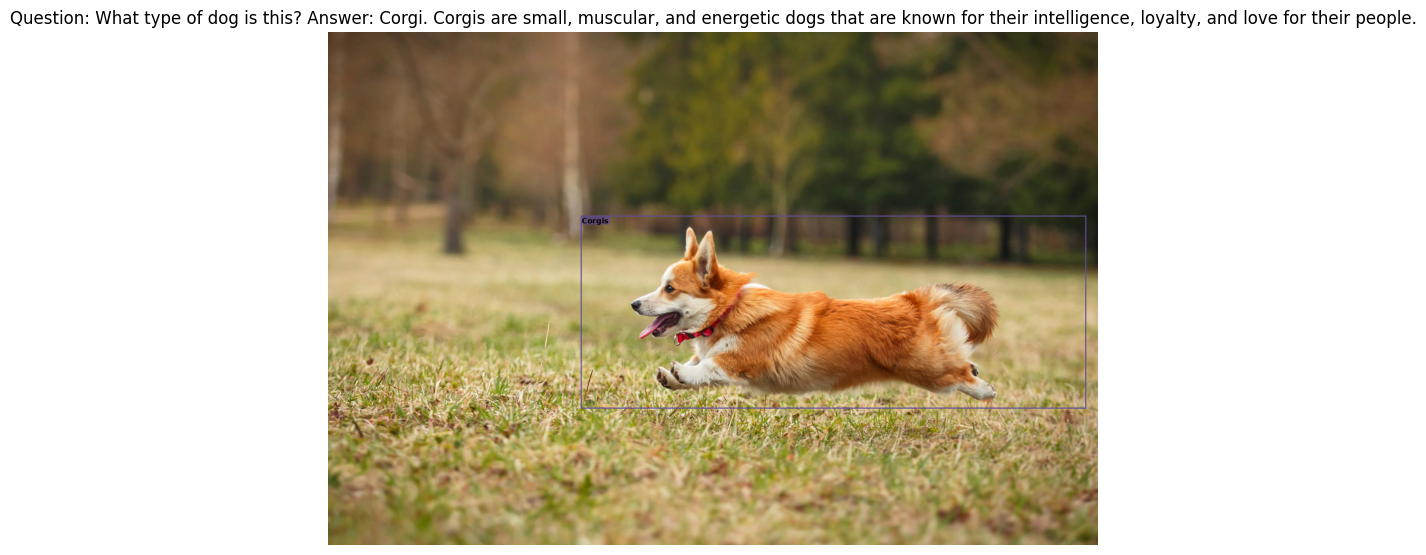

In [7]:
url = f"{server_base}/infer"

# for each image, prompts is a string corresponding to one of the following tasks:
# DEFAULT - Grounded Image Captioning (brief)  -> prompt = "<grounding> An image of"
# Ground Image Captioning (detailed)           -> prompt = "<grounding> Describe this image in detail:"
# Grounded VQA                                 -> prompt = f"<grounding> Question: {question} Answer:"
# Phrase Grounding                             -> prompt = f"<grounding><phrase> {phrase}</phrase>"
# set prompts to None to use servers default prompt

question = "What type of dog is this?"
prompts = ["<grounding> An image of", "<grounding> Describe this image in detail:", f"<grounding> Question: {question} Answer:"]

# inference parameters determines the generation settings of the server
inference_parameters = {'max_new_tokens': 64, 'max_batch_size': 16}

payload = {'images': [image_b64_snowman, image_b64_table, image_b64_corgi], 'inference_parameters': inference_parameters, 'prompts': prompts}

response = requests.post(url, json=payload, headers=headers)

if response.status_code == 200:
    output = response.json()
else:
    print(f"Request failed with status code: {response.status_code}")

from PIL import ImageFont

font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"
font_size = 20 
font = ImageFont.truetype(font_path, font_size)
_ = visualize_kosmos2(payload, output, font=font)

### Unload Model

In [8]:
url = f"{server_base}/unload"

response = requests.post(url, headers=headers)

if response.status_code == 200:
    output = response.json()
    print(output)
else:
    print(f"Request failed with status code: {response.status_code}")

{'unloaded': True}


In [9]:
#with open("example_artifact_kosmos2.json", "w", encoding="utf-8") as f:
#    json.dump(output, f, ensure_ascii=False, indent=4)